In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"


import glob
import collections

import pickle
import sys
import glob
from pathlib import Path, PurePath
path = Path.cwd()
parent_path = path.parents[1]
sys.path.append(str(PurePath(parent_path, 'neuroformer')))
sys.path.append('neuroformer')
sys.path.append('.')
sys.path.append('../')


import pandas as pd
import numpy as np
from einops import rearrange

from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F
import pandas as pd
from torch.utils.data.dataloader import DataLoader

import math
from torch.utils.data import Dataset

from neuroformer.trainer import Trainer, TrainerConfig
from neuroformer.utils import set_seed


from scipy import io as scipyio
from scipy.special import softmax
import skimage
import skvideo.io
from neuroformer.utils import print_full
from scipy.ndimage import gaussian_filter, uniform_filter


import matplotlib.pyplot as plt
from neuroformer.visualize import *
set_plot_params()
parent_path = os.path.dirname(os.path.dirname(os.getcwd())) + "/"


from neuroformer.model_neuroformer import GPT, GPTConfig, neuralGPTConfig
from neuroformer.trainer import Trainer, TrainerConfig


import json
# for i in {1..10}; do python3 -m gather_atts.py; done

from attention.LRN_attention import *

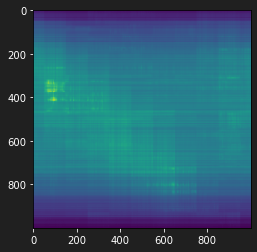

In [3]:
att_matrix = "./a_yiyi/a_yiyi_1/LRN_Attentions/6_att_matrix_gradcam_False.npy"

att_matrix = np.load(att_matrix)

plt.imshow(att_matrix)

# plot a regression line through matrix

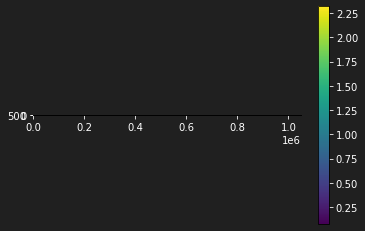

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten the matrix into a 1D array
data = att_matrix.flatten()

# Generate the x-coordinates (assuming equal spacing)
x = np.arange(len(data))

# Perform linear regression
m, c = np.polyfit(x, data, 1)

# Generate the line
line = m * x + c

# Plot the matrix and the regression line
plt.imshow(att_matrix, origin='lower')
plt.plot(x, line, 'r-', linewidth=1)
plt.colorbar()
plt.show()

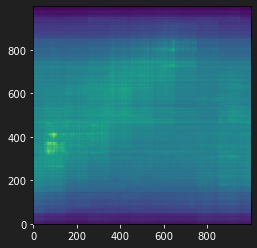

In [12]:
plt.imshow(att_matrix, origin='lower')

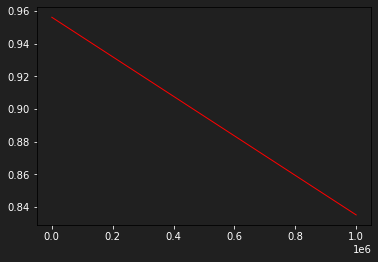

In [9]:
plt.plot(line, 'r-', linewidth=1)


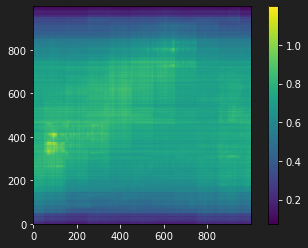

In [14]:
# Apply a logarithmic transformation to the matrix
att_matrix_log = np.log1p(att_matrix)

# Flatten the transformed matrix into a 1D array
data = att_matrix_log.flatten()

# Generate the x-coordinates (assuming equal spacing)
x = np.arange(len(data))

# Perform linear regression
m, c = np.polyfit(x, data, 1)

# Generate the line
line = m * x + c

# Plot the matrix and the regression line
plt.imshow(att_matrix_log, origin='lower')
plt.colorbar()
plt.show()

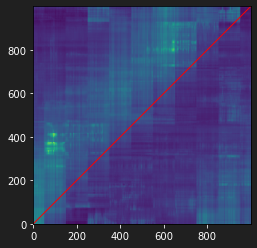

In [17]:
# normalize each row
att_conn = att_matrix_log
att_conn_mean = att_conn / att_conn.sum(axis=1, keepdims=True)
plt.imshow(att_conn_mean, origin='lower')
y = np.arange(len(att_conn))
x = y
plt.plot(x, y, 'r-', linewidth=1)